In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as wb
%matplotlib inline

Vão ser análisadas ações das empresas Omega Energia (OMGE3) e EDP Energias do Brasil SA (ENBR3)

In [0]:
start = '2018-01-01'
end = '2020-06-02'
omg = wb.DataReader('OMGE3.SA','yahoo',start=start,end=end)
edp = wb.DataReader('ENBR3.SA','yahoo',start=start,end=end)

In [0]:
#todas ações
stocks = pd.concat([omg['Adj Close'],edp['Adj Close']],axis=1)
stocks.columns = ['omg','edp']

In [54]:
stocks

,omg,edp
Date,,
2018-01-02,17.207325,12.125957
2018-01-03,17.107862,11.579437
2018-01-04,16.908934,11.596516
2018-01-05,17.207325,11.494042
2018-01-08,17.107862,11.681910
...,...,...
2020-05-27,32.470001,17.299999
2020-05-28,32.509998,17.410000
2020-05-29,32.020000,17.670000


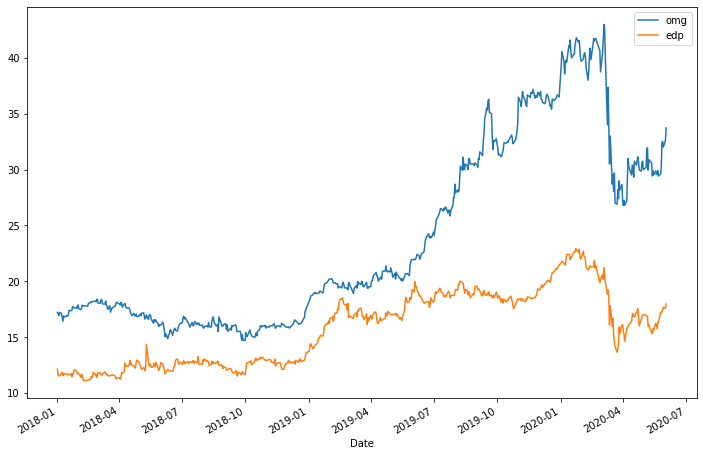

In [55]:
#Evolução das ações no tempo
stocks.plot(figsize=(12,8))

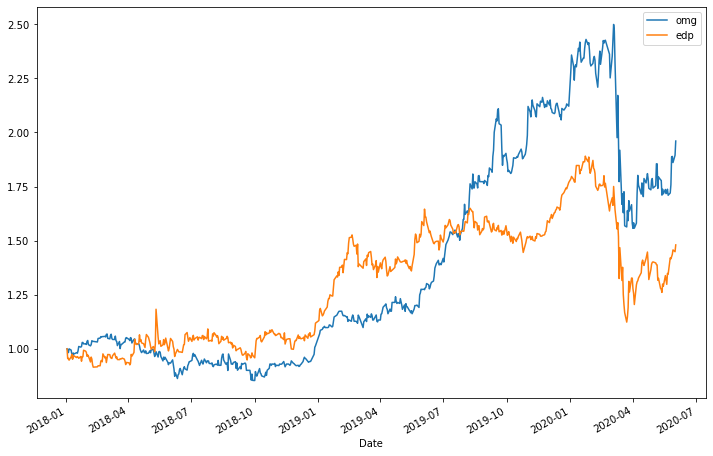

In [56]:
#Evolução das ações no tempo, com preços equiparados
(stocks/stocks.iloc[0]).plot(figsize=(12,8))

In [57]:
#retornos em escala log
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,omg,edp
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.005797,-0.046117
2018-01-04,-0.011696,0.001474
2018-01-05,0.017493,-0.008876
2018-01-08,-0.005797,0.016213


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febcbc34240>,
      dtype=object)

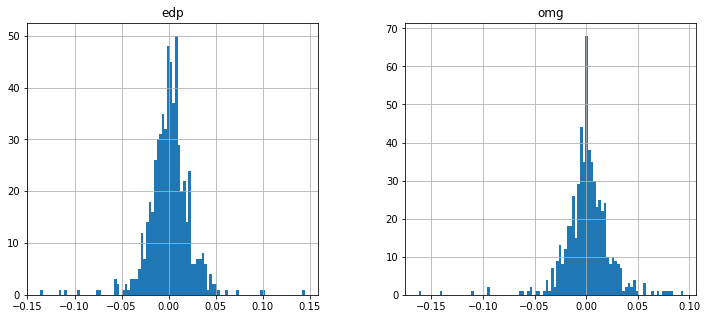

In [58]:
#histogramas de retornos historicos
log_ret.hist(bins=100,figsize=(12,5))

In [59]:
#média de retornos
log_ret.mean()

omg    0.001133
edp    0.000660
dtype: float64

In [60]:
#covariancia de retornos (correlação entre ações)
log_ret.cov() * 252

,omg,edp
omg,0.126114,0.050380
edp,0.050380,0.127354


In [0]:
#Métodos de alocação calculando indice sharpe e testando dentre 5000 alocações randomicas diferentes a melhor delas
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)

for ind in range(num_ports):

    weights = np.array(np.random.random(2))
    weights = weights/np.sum(weights)

    #save weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum( (log_ret.mean() * weights) * 252)

    # Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [62]:
#Maior indice sharpe (retorno/risco)
sharpe_arr.max()

0.8197804072865711

In [63]:
#alocação para melhor (retorno/risco)
all_weights[sharpe_arr.argmax(),:]

array([0.8091581, 0.1908419])

In [0]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

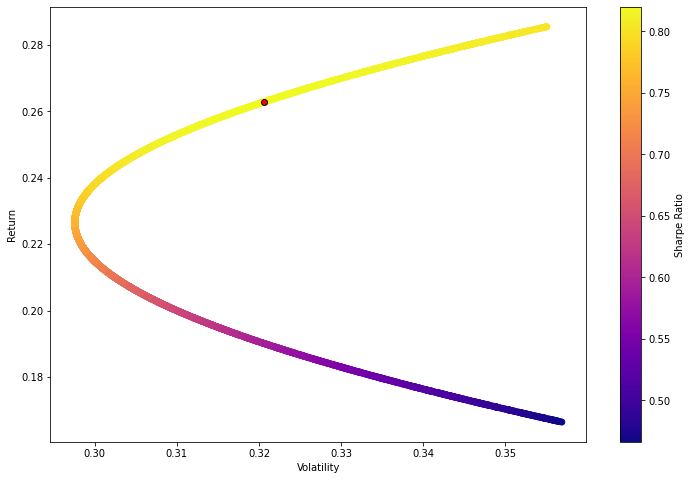

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black')

Conclusão: Considerando os efeitos da crise e volatilidade provocada pelo Covid deve ser feita uma alocação de 81% em valor de ativos da Omega Energia e 19% em ativos da EDP Energias do Brasil SA.